In [2]:
import os
image_path = "../dataset/pizza_steak_sushi/"

train_dir = os.path.join(image_path, "train")
test_dir = os.path.join(image_path, "test")

In [11]:
from torchvision import transforms
from data_setup import createDataloader

train_transform = transforms.Compose(
    [   
        transforms.Resize((224, 224)) ,
        transforms.ToTensor()

    ]
)

train_DL, test_DL, _classes = createDataloader(train_dir, test_dir, 32, train_transform, train_transform )

In [13]:
len(train_DL)

71

In [73]:
_classes

['pizza', 'steak', 'sushi']

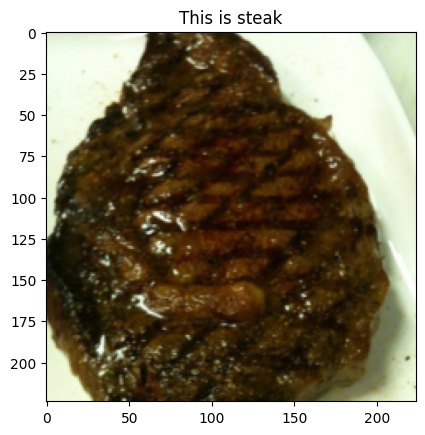

In [78]:
# data visuals
import  matplotlib.pyplot as plt
from PIL import Image
import random

img, lable = next(iter(test_DL))

rand_id = random.randint(0,31)

show_img = img[rand_id]
plt.title("This is {}".format(_classes[lable[rand_id]]))
plt.imshow(show_img.permute(1,2,0))

# Replicating ViT

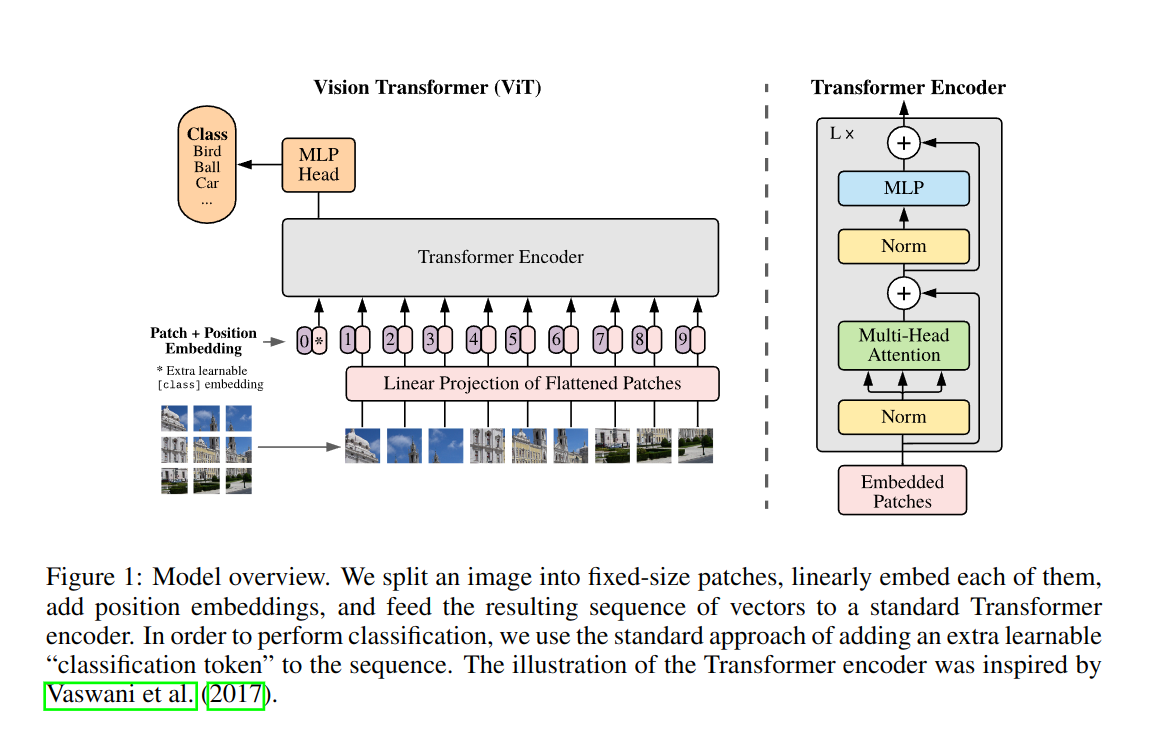

### Embedding - Leaning representations, start from a random initialization and improve them through training.
    - 1D vector will be input to the model


##### * Equation 1
```python
x_input = [class_token, image_patch1, image_patch2,.. image_patchN] + [class_token_pos, image_patch1_pos, image_patch2_pos,.. image_patchN_pos]
```

##### * Equation 2
```python
x_MSA_output = MultiHSA(LayerNorm(x_input)) + x_input
```

##### * Equation 3
```python
x_MLP_output = MLP(LayerNorm(x_MSA_output)) + x_MSA_output
```

<b>MLP - Multi Layer Perceptron (a nn with multiple layers)</b>

##### Equation 4 - Output
```python
x_output = LinearLayer(LayerNorm(x_MLP_output))
```

## Patch position and class Embeding